In [40]:
import yfinance as yf
from yahoo_fin import stock_info

In [41]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [76]:
#TICKER = 'IBM'
TICKER = 'O'
DIV_PERIODS = 7

In [77]:
stock_basic_info = yf.Ticker(TICKER).info

In [78]:
stock_basic_info

{'zip': '92130',
 'sector': 'Real Estate',
 'fullTimeEmployees': 388,
 'longBusinessSummary': "Realty Income, The Monthly Dividend Company, is an S&P 500 company dedicated to providing stockholders with dependable monthly income. The company is structured as a REIT, and its monthly dividends are supported by the cash flow from over 6,500 real estate properties owned under long-term lease agreements with our commercial clients. To date, the company has declared 608 consecutive common stock monthly dividends throughout its 52-year operating history and increased the dividend 109 times since Realty Income's public listing in 1994 (NYSE: O). The company is a member of the S&P 500 Dividend Aristocrats index. Additional information about the company can be obtained from the corporate website at www.realtyincome.com.",
 'city': 'San Diego',
 'phone': '858-284-5000',
 'state': 'CA',
 'country': 'United States',
 'companyOfficers': [],
 'website': 'https://www.realtyincome.com',
 'maxAge': 1,
 

과거 배당금 정보 가져 오기

In [79]:
end_date = datetime.now().strftime("%Y-%m-%d")
print("start date: " , end_date)
start_date = (datetime.now() - relativedelta(years=DIV_PERIODS)).strftime("%Y-%m-%d")
print("end date: ", start_date)

start date:  2022-12-15
end date:  2015-12-15


In [80]:
dividends = stock_info.get_dividends(TICKER, start_date=start_date, end_date=end_date)

In [81]:
dividends.head(3)

,dividend,ticker
2015-12-30,0.185078,O
2016-01-28,0.192829,O
2016-02-26,0.192829,O


In [82]:
dividends.tail(3)

,dividend,ticker
2022-09-30,0.248,O
2022-10-31,0.248,O
2022-11-30,0.248,O


10년간 주가 정보 가져오기

In [83]:
# Get the data
stock_data = yf.download(TICKER, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [84]:
stock_data.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-15,48.236435,48.817829,48.091084,48.391472,35.815502,2284435
2015-12-16,48.643410,49.670544,48.546513,49.641472,36.740650,2383404
2015-12-17,49.622093,49.689922,49.273254,49.418606,36.575687,2528606


In [85]:
stock_data.loc[dividends.index].head(3)

,Open,High,Low,Close,Adj Close,Volume
2015-12-30,50.465115,50.784885,50.242249,50.310078,37.372284,1331693
2016-01-28,53.149223,53.798450,52.926357,53.168606,39.638931,3436457
2016-02-26,58.003876,58.003876,56.695736,56.812016,42.495884,2571538


In [86]:
df_close_price = stock_data.loc[dividends.index]['Close']

In [87]:
df_close_price[:3]

2015-12-30    50.310078
2016-01-28    53.168606
2016-02-26    56.812016
Name: Close, dtype: float64

In [88]:
dividends['close'] = df_close_price

In [89]:
dividends.head(3)

,dividend,ticker,close
2015-12-30,0.185078,O,50.310078
2016-01-28,0.192829,O,53.168606
2016-02-26,0.192829,O,56.812016


In [90]:
dividends = dividends.drop('ticker', axis=1)

In [91]:
dividends.head(3)

,dividend,close
2015-12-30,0.185078,50.310078
2016-01-28,0.192829,53.168606
2016-02-26,0.192829,56.812016


In [92]:
div_freq = round(len(dividends.index)/DIV_PERIODS)

In [95]:
div_freq

12

In [96]:
dividends['div yield'] = round(dividends['dividend']*div_freq / dividends['close'] * 100, 2)

In [97]:
dividends.head(3)

,dividend,close,div yield
2015-12-30,0.185078,50.310078,4.41
2016-01-28,0.192829,53.168606,4.35
2016-02-26,0.192829,56.812016,4.07


<AxesSubplot:>

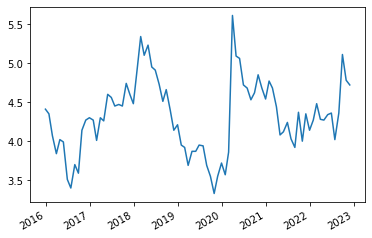

In [98]:
dividends['div yield'].plot()

In [99]:
div_min = min(dividends['div yield'])
div_max = max(dividends['div yield'])

In [100]:
div_min, div_max

(3.33, 5.61)

In [101]:
buy_price = dividends['dividend'][-1] * div_freq * 100 / div_min
buy_price

89.36936936936938

In [102]:
sell_price = dividends['dividend'][-1] * div_freq * 100 / div_max
sell_price

53.04812834224599

In [103]:
current_datetime = datetime.strptime(end_date, "%Y-%m-%d")

In [104]:
current_datetime

datetime.datetime(2022, 12, 15, 0, 0)

In [105]:
current_price = stock_data.iloc[-1]['Close']

In [106]:
current_price

64.66000366210938

In [107]:
last_dividend = dividends.iloc[-1]['dividend']
last_dividend

0.248

In [115]:
current_div_yield = round(last_dividend*div_freq/current_price*100, 2)
current_div_yield

4.6

In [116]:
import matplotlib.pyplot as plt

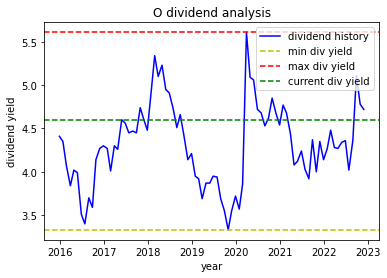

In [117]:
plt.plot(dividends['div yield'],  color='b', label = 'dividend history')
plt.axhline(y=div_min, color='y', linestyle='--', label='min div yield')
plt.axhline(y=div_max, color='r', linestyle='--', label='max div yield')
plt.axhline(y=current_div_yield, color='g', linestyle='--', label='current div yield')
plt.title(f'{TICKER} dividend analysis')
plt.xlabel('year')
plt.ylabel('dividend yield')
plt.legend()
plt.show()

In [120]:
def get_percentage(input, min, max):
    return round((input - min) / (max - min) * 100)

def calculate_buysell_score(current_div_yield, div_min, div_max):
    buy_score = get_percentage(current_div_yield, div_min, div_max)
    sell_score = 100 - buy_score
    return buy_score, sell_score

In [121]:
buy_score, sell_score = calculate_buysell_score(current_div_yield, div_min, div_max)
print(f'buy score = {buy_score}\nsell score = {sell_score}')

buy score = 56
sell score = 44


In [ ]:
t